In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import metadata_util
spec_names = metadata_util.read_spec_names()
phy_names = metadata_util.get_phy_names()
jval_names = metadata_util.read_jval_names()
used_jvals = sorted(metadata_util.get_used_jvals())

In [3]:
import sys
sys.path.append("../../GEOSChem/KPP4GC/GC_12_Standard/") # dirty fix to allow importing
import kpp4py

# Prepare

In [4]:
ds = xr.open_dataset('./KPP_fields_100.nc')
ds.coords['nphotol'] = jval_names

In [5]:
ds_sub = ds.isel(lev=slice(0, 20)).stack(sample=('lev', 'lat', 'lon')).transpose()
ds_sub

<xarray.Dataset>
Dimensions:   (nphotol: 130, nphy: 4, nreact: 725, nspec: 240, sample: 66240)
Coordinates:
  * nphotol   (nphotol) object '1/O2/O2' '2/O3/O3' '3/O3/O3(1D)' '4/H2O/H2O' ...
  * sample    (sample) MultiIndex
  - lev       (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lat       (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lon       (sample) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Dimensions without coordinates: nphy, nreact, nspec
Data variables:
    C_before  (sample, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    C_after   (sample, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    PHOTOL    (sample, nphotol) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PHY       (sample, nphy) float64 203.3 703.9 2.508e+19 1.243e+14 203.3 ...
    RCONST    (sample, nreact) float64 1.872e-15 1.668e-14 8.976e-16 ...

In [6]:
df_jval_all = pd.DataFrame(ds_sub['PHOTOL'].values, columns=jval_names)
df_jval_all.describe()

,1/O2/O2,2/O3/O3,3/O3/O3(1D),4/H2O/H2O,5/HO2/HO2,6/NO/NO,7/CH2O/H2COa,8/CH2O/H2COb,9/H2O2/H2O2,10/MP/CH3OOH,...,121/IONO2/IONO2,122/I2O2/I2O2,123/CH3I/CH3I,124/CH2I2/CH2I2,125/CH2ICl/CH2ICl,126/CH2IBr/CH2IBr,127/I2O4/I2O2,128/I2O3/I2O3,129/IBr/IBr,130/ICl/ICl
count,6.624000e+04,6.624000e+04,6.624000e+04,66240.0,66240.0,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,...,66240.000000,66240.000000,6.624000e+04,66240.000000,6.624000e+04,6.624000e+04,66240.000000,66240.000000,66240.000000,66240.000000
mean,3.146392e-23,1.747627e-04,7.114664e-06,0.0,0.0,7.397172e-21,1.041820e-05,1.700476e-05,2.177038e-06,1.766407e-06,...,0.003438,0.016256,1.755166e-06,0.002683,4.356593e-05,1.540992e-04,0.016256,0.014323,0.033050,0.010531
std,1.222728e-21,2.142729e-04,1.346757e-05,0.0,0.0,2.810189e-19,1.495635e-05,2.322146e-05,3.089548e-06,2.444650e-06,...,0.004515,0.021180,2.669681e-06,0.003724,6.330642e-05,2.201932e-04,0.021180,0.018272,0.040204,0.012834
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.042390e-32,8.311273e-07,9.663448e-09,0.0,0.0,1.712309e-30,4.209816e-08,9.787369e-08,1.076910e-08,1.007236e-08,...,0.000027,0.000099,6.625537e-09,0.000015,2.042169e-07,7.509635e-07,0.000099,0.000098,0.000163,0.000055
75%,4.979535e-27,3.885626e-04,7.361083e-06,0.0,0.0,2.832742e-25,1.957647e-05,3.422640e-05,4.116939e-06,3.466998e-06,...,0.007213,0.033953,2.933217e-06,0.005257,7.880984e-05,2.880934e-04,0.033953,0.030616,0.074268,0.023613
max,1.290387e-19,8.399320e-04,8.182655e-05,0.0,0.0,3.132245e-17,6.753271e-05,1.032846e-04,1.366264e-05,1.083354e-05,...,0.019189,0.088982,1.258204e-05,0.016485,2.863845e-04,9.808105e-04,0.088982,0.074659,0.155274,0.049692


In [7]:
df_jval = df_jval_all.iloc[:,used_jvals]
df_jval.shape

(66240, 122)

In [8]:
df_jval.max().nsmallest(5)

62/ALD2/ActAlx      0.000000e+00
100/SO4/H2SO4       0.000000e+00
1/O2/O2             1.290387e-19
46/HCFC22/CHF2Cl    1.404748e-18
41/CFC115/F115      2.430385e-18
dtype: float64

In [9]:
df_jval.drop(['62/ALD2/ActAlx', '100/SO4/H2SO4'], axis=1, inplace=True)
df_jval.shape

/Users/zhuangjw/Research/Computing/miniconda3/envs/sci/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(66240, 120)

# Examine correlation

In [10]:
%time df_jval_corr = df_jval.corr()

CPU times: user 22.3 s, sys: 231 ms, total: 22.5 s
Wall time: 22.9 s


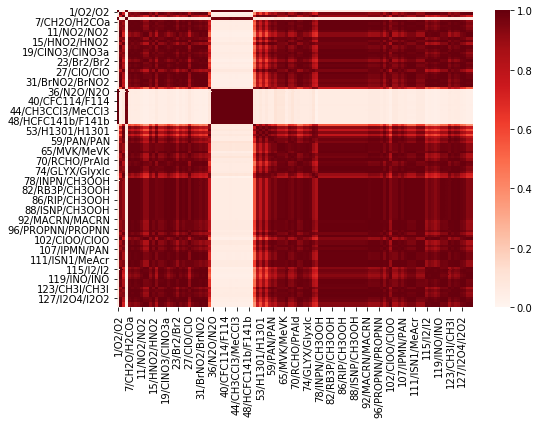

In [11]:
plt.figure(figsize=[8, 6])
sns.heatmap(df_jval_corr, vmin=0, vmax=1, cmap='Reds')
plt.tight_layout()
plt.savefig('jvals_corr.png', dpi=200)

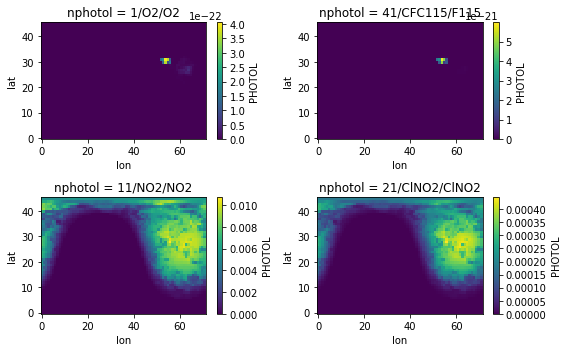

In [12]:
fig, axes = plt.subplots(2, 2, figsize=[8, 5])
ds['PHOTOL'][0,:,:,0].plot(ax=axes[0,0])
ds['PHOTOL'][0,:,:,40].plot(ax=axes[0,1])
ds['PHOTOL'][0,:,:,10].plot(ax=axes[1,0])
ds['PHOTOL'][0,:,:,20].plot(ax=axes[1,1])
fig.tight_layout()
fig.savefig('jvals_spatial.png', dpi=200)

# Dimensionality redutinon with SVD

In [13]:
scaler = StandardScaler()

In [14]:
jval_normed = scaler.fit_transform(df_jval)

In [15]:
jval_normed.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [16]:
pca = PCA(n_components=3)

In [17]:
pca.fit(jval_normed)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)

(array([0.82065092, 0.13257118, 0.03919212]),
 array([0.82065092, 0.95322211, 0.99241423]))

In [19]:
jval_reduced = pca.transform(jval_normed)
jval_reduced.shape

(66240, 3)

In [20]:
jval_recover = scaler.inverse_transform(pca.inverse_transform(jval_reduced))
jval_recover.shape

(66240, 120)

In [21]:
jval_r2 = r2_score(jval_recover, df_jval, multioutput='raw_values')
print(jval_r2)

[0.99763115 0.98383267 0.99688348 0.95595594 0.99669175 0.99703044
 0.9981127  0.99827589 0.99905669 0.9801059  0.9801059  0.99154815
 0.9990101  0.99838602 0.99330559 0.99330559 0.99904324 0.99834423
 0.9985188  0.99938413 0.9850509  0.99884698 0.99934222 0.99962063
 0.99690257 0.99827338 0.99899686 0.99899686 0.99469646 0.99858959
 0.99525011 0.95742292 0.99973443 0.99992259 0.99866143 0.99918509
 0.99935089 0.99945723 0.99854033 0.99893249 0.99997895 0.99951868
 0.99941539 0.99968489 0.99915185 0.99935165 0.7321459  0.99497099
 0.98097895 0.99346776 0.98035217 0.99182953 0.99468543 0.98010696
 0.97995832 0.97995832 0.97995832 0.99862903 0.99762624 0.96837946
 0.99709962 0.99135855 0.99255316 0.99755945 0.99764012 0.99803693
 0.9950054  0.92867667 0.99827589 0.99827589 0.99827589 0.99827589
 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589
 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589
 0.9968254  0.99728434 0.99811004 0.99811004 0.99723988 0.9982

In [22]:
df_r2 = pd.Series(jval_r2, index=df_jval.columns)
df_r2.nsmallest(20)

50/CH3Br/CH3Br      0.732146
77/ACET/Acet-b      0.928677
6/NO/NO             0.955956
34/OCS/OCS          0.957423
69/MEK/MEKeto       0.968379
118/OIO/OIO         0.978161
115/I2/I2           0.978342
129/IBr/IBr         0.978944
63/MVK/MeVK         0.979958
64/MVK/MeVK         0.979958
65/MVK/MeVK         0.979958
13/NO3/NO3          0.980106
12/NO3/NO3          0.980106
61/ALD2/ActAld      0.980107
55/CH2Br2/CH2Br2    0.980352
53/H1301/H1301      0.980979
130/ICl/ICl         0.981181
102/ClOO/ClOO       0.981668
2/O3/O3             0.983833
23/Br2/Br2          0.985051
dtype: float64

In [23]:
df_r2.nlargest(20)

44/CH3CCl3/MeCCl3    0.999979
37/CFC11/CFCl3       0.999923
122/I2O2/I2O2        0.999831
127/I2O4/I2O2        0.999831
36/N2O/N2O           0.999734
47/HCFC123/F123      0.999685
26/Cl2O2/Cl2O2       0.999621
45/CH2Cl2/CH2Cl2     0.999519
41/CFC115/F115       0.999457
46/HCFC22/CHF2Cl     0.999415
22/Cl2/Cl2           0.999384
49/HCFC142b/F142b    0.999352
40/CFC114/F114       0.999351
25/OClO/OClO         0.999342
39/CFC113/F113       0.999185
48/HCFC141b/F141b    0.999152
121/IONO2/IONO2      0.999140
11/NO2/NO2           0.999057
19/ClNO3/ClNO3a      0.999043
15/HNO2/HNO2         0.999010
dtype: float64

In [24]:
df_recover = pd.DataFrame(jval_recover, columns=df_jval.columns)
df_recover.head() # some slightly negative values

,1/O2/O2,2/O3/O3,3/O3/O3(1D),6/NO/NO,7/CH2O/H2COa,8/CH2O/H2COb,9/H2O2/H2O2,10/MP/CH3OOH,11/NO2/NO2,12/NO3/NO3,...,121/IONO2/IONO2,122/I2O2/I2O2,123/CH3I/CH3I,124/CH2I2/CH2I2,125/CH2ICl/CH2ICl,126/CH2IBr/CH2IBr,127/I2O4/I2O2,128/I2O3/I2O3,129/IBr/IBr,130/ICl/ICl
0,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
1,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
2,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
3,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
4,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397


In [42]:
def compare_jval(var):
    plt.scatter(df_jval[var], df_recover[var], alpha=0.05, s=2)
    plt.title(var)
    plt.xlabel('original value')
    plt.ylabel('approximate value')

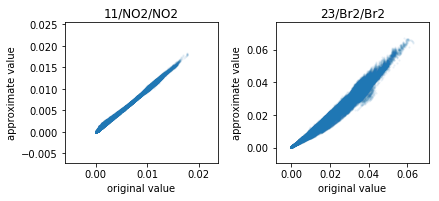

In [53]:
plt.figure(figsize=[6, 5])
plt.subplot(221); compare_jval('11/NO2/NO2')
plt.subplot(222); compare_jval('23/Br2/Br2')
plt.tight_layout()
plt.savefig('approx_jvals.png', dpi=200)

# Compare integration results

## Reference solution

In [26]:
ref_c_before = ds_sub['C_before'].values
ref_phy = ds_sub['PHY'].values
ref_photol = ds_sub['PHOTOL'].values

ref_c_before.shape, ref_phy.shape, ref_photol.shape

((66240, 240), (66240, 4), (66240, 130))

In [27]:
%%time
ref_c_after = kpp4py.onestep(ref_c_before.T, ref_phy.T, ref_photol.T).T

CPU times: user 53.5 s, sys: 625 ms, total: 54.2 s
Wall time: 54.5 s


In [28]:
ref_c_after.shape

(66240, 240)

## Use re-constructed Jvals

In [29]:
df_recover_full = df_jval_all.copy()
df_recover_full[df_recover.columns] = df_recover # overwrite relavant jvals

approx_photol = df_recover_full.values
approx_photol.shape

(66240, 130)

In [30]:
%%time
approx_c_after = kpp4py.onestep(ref_c_before.T, ref_phy.T, approx_photol.T).T

CPU times: user 1min 2s, sys: 422 ms, total: 1min 3s
Wall time: 1min 3s


In [31]:
approx_c_after.shape

(66240, 240)

In [32]:
approx_r2 = r2_score(ref_c_after, approx_c_after, multioutput='raw_values')
df_r2 = pd.Series(approx_r2, index=spec_names)

In [33]:
df_r2[['NO', 'NO2', 'O3', 'OH']]

NO     0.999174
NO2    0.995543
O3     0.999998
OH     0.999222
dtype: float64

In [34]:
df_r2.nsmallest(30)

Cl2O2      -21378.397672
I2             -0.017595
I2O4            0.052268
IBr             0.095350
NO3             0.214534
OIO             0.230227
I2O2            0.342551
ISNOOA          0.496665
ClO             0.556616
Br2             0.662458
ICl             0.713545
ClOO            0.762912
BrO             0.808324
MAN2            0.874906
N2O5            0.879765
N               0.907038
MAOPO2          0.911947
LISOPNO3        0.917435
PRN1            0.930021
ISNOOB          0.941644
INO2            0.950755
MACRNO2         0.951137
IO              0.969089
NMAO3           0.975857
IONO2           0.976599
BrCl            0.981179
OLND            0.982959
BRO2            0.984053
OLNN            0.985069
OClO            0.985453
dtype: float64

In [35]:
def plot_compare(var):
    idx = spec_names.index(var)
    plt.scatter(ref_c_after[:,idx], approx_c_after[:,idx], alpha=0.4, s=2)
    plt.title(var)
    plt.xlabel('original')
    plt.ylabel('use approximated Jvals')

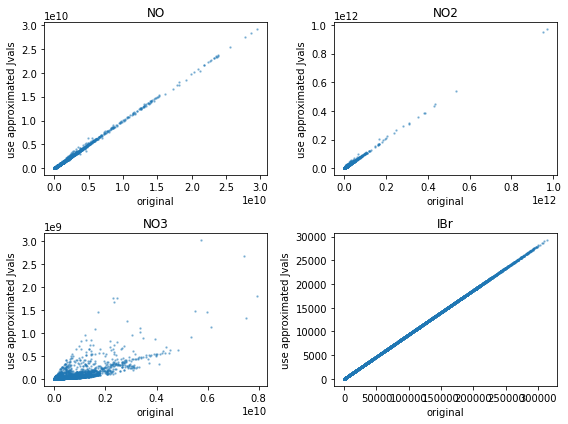

In [51]:
plt.figure(figsize=[8, 6])
plt.subplot(221); plot_compare('NO')
plt.subplot(222); plot_compare('NO2')
plt.subplot(223); plot_compare('NO3')
plt.subplot(224); plot_compare('IBr')
plt.tight_layout()
plt.savefig('results_by_approx_jvals.png', dpi=200)